Step 1: Data Preparation
Download and Load the MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the images to include the channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


Step 2: Model Building
Design a Simple Neural Network

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten the input image
    Dense(128, activation='relu'),     # First dense layer
    Dense(64, activation='relu'),      # Second dense layer
    Dense(10, activation='softmax')    # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


Step 3: Model Training
Train the Neural Network

In [9]:
# Train the model
history = model.fit(train_images, train_labels, 
                    validation_split=0.2,  # Use 20% of the training data for validation
                    epochs=10, 
                    batch_size=32)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8654 - loss: 0.4613 - val_accuracy: 0.9617 - val_loss: 0.1297
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9649 - loss: 0.1166 - val_accuracy: 0.9693 - val_loss: 0.1012
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9769 - loss: 0.0741 - val_accuracy: 0.9730 - val_loss: 0.0902
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9820 - loss: 0.0560 - val_accuracy: 0.9774 - val_loss: 0.0818
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9865 - loss: 0.0417 - val_accuracy: 0.9754 - val_loss: 0.0871
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9905 - loss: 0.0305 - val_accuracy: 0.9749 - val_loss: 0.0941
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9922 - loss: 0.0233 - val_accuracy: 0.9753 - val_loss: 0.0924
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9920 - loss: 0.0245 - 

Step 4: Model Evaluation
Evaluate the Model on the Test Set

In [10]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.1127
Test accuracy: 0.9787


Visualize Model Performance

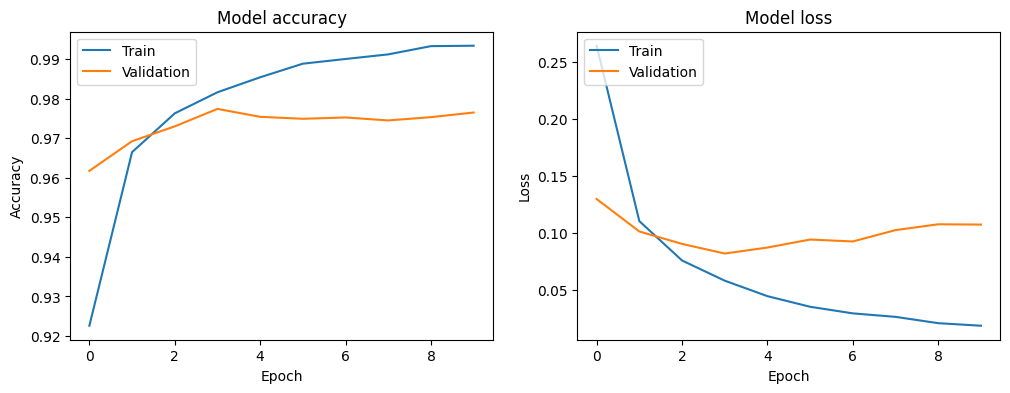

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
